<a href="https://colab.research.google.com/github/hisaylama/Graph-Convolution-Neural-Newtwork/blob/main/Basic_Molecular_Representation_for_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Reading, Drawing and Analyzing a Moelcules**

Read the SMILER string of Caffeine and draw its molecular structure



In [ ]:
!pip install rdkit-pypi -qqq #instal rdkit from python programming index in quite mode

# import RKit
from rdkit import Chem
from rdkit.Chem import Draw

#Define the SMILE string of caffeine

caffeine_smiles =  'CN1C=NC2=C1C(=O)N(C(=O)N2C)C'

#loading the SMILES string to an object mol
mol = Chem.MolFromSmiles(caffeine_smiles)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.4/29.4 MB 34.1 MB/s eta 0:00:00


In [ ]:
#draw the molecules
Draw.MolToFile(mol, 'caffeine.png')

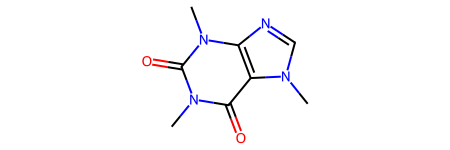

In [ ]:
#Visualize the caffeine molecule
mol

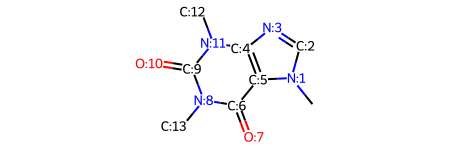

In [ ]:
#Draw the molecules with the property---
# for i, atom in enumerate(mol.GetAtoms()):
#   atom.SetProp("molAtomMapnumber", str(atom.GetIdx()))

# Draw the molecules with atom index
def mol_with_atom_index(mol):
    for atom in mol.GetAtoms():
        atom.SetAtomMapNum(atom.GetIdx())
    return mol

mol_with_atom_index(mol)
Draw.MolToFile(mol, 'caffeine_with_prop.png')
mol
#How does the index works

In [ ]:
# import RDKit ----------------------------------------------------------------
from rdkit import Chem

# define the smiles string and covert it into a molecule sturcture ------------
caffeine_smiles = 'CN1C=NC2=C1C(=O)N(C(=O)N2C)C'

mol = Chem.MolFromSmiles(caffeine_smiles)

In [ ]:
#Print the details of atoms and bonds in the molecules in caffeine

# print the atoms of the molecule ---------------------------------------------
for atom in mol.GetAtoms():
    print("GetIdx:", atom.GetIdx(), ",",
          "GetAtomicNum:", atom.GetAtomicNum(), ",",
          "GetIsAromatic:", atom.GetIsAromatic(), ",",
          "GetSymbol:", atom.GetSymbol())

GetIdx: 0 , GetAtomicNum: 6 , GetIsAromatic: False , GetSymbol: C
GetIdx: 1 , GetAtomicNum: 7 , GetIsAromatic: True , GetSymbol: N
GetIdx: 2 , GetAtomicNum: 6 , GetIsAromatic: True , GetSymbol: C
GetIdx: 3 , GetAtomicNum: 7 , GetIsAromatic: True , GetSymbol: N
GetIdx: 4 , GetAtomicNum: 6 , GetIsAromatic: True , GetSymbol: C
GetIdx: 5 , GetAtomicNum: 6 , GetIsAromatic: True , GetSymbol: C
GetIdx: 6 , GetAtomicNum: 6 , GetIsAromatic: True , GetSymbol: C
GetIdx: 7 , GetAtomicNum: 8 , GetIsAromatic: False , GetSymbol: O
GetIdx: 8 , GetAtomicNum: 7 , GetIsAromatic: True , GetSymbol: N
GetIdx: 9 , GetAtomicNum: 6 , GetIsAromatic: True , GetSymbol: C
GetIdx: 10 , GetAtomicNum: 8 , GetIsAromatic: False , GetSymbol: O
GetIdx: 11 , GetAtomicNum: 7 , GetIsAromatic: True , GetSymbol: N
GetIdx: 12 , GetAtomicNum: 6 , GetIsAromatic: False , GetSymbol: C
GetIdx: 13 , GetAtomicNum: 6 , GetIsAromatic: False , GetSymbol: C


In [ ]:
# print the bonds of the molecule ---------------------------------------------
for bond in mol.GetBonds():
    print(bond.GetBeginAtomIdx(),',',
          bond.GetEndAtomIdx(),',',
          bond.GetBondType())

0 , 1 , SINGLE
1 , 2 , AROMATIC
2 , 3 , AROMATIC
3 , 4 , AROMATIC
4 , 5 , AROMATIC
5 , 6 , AROMATIC
6 , 7 , DOUBLE
6 , 8 , AROMATIC
8 , 9 , AROMATIC
9 , 10 , DOUBLE
9 , 11 , AROMATIC
11 , 12 , SINGLE
8 , 13 , SINGLE
5 , 1 , AROMATIC
11 , 4 , AROMATIC


## Generating Molecular Fingerprint from a SMILES String

`fingerprint` functions which outputs could be used for calculating molecular similarity or as the inputs to the downstream machine learning models.

`RDKit Fingerprint` and `Morgan Fingerprint`

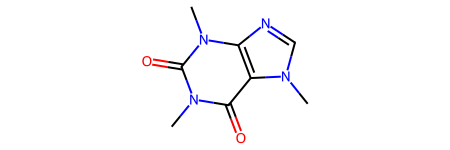

In [ ]:
#import RDKit
from rdkit import Chem
from rdkit.Chem import RDKFingerprint
from rdkit.Chem import rdMolDescriptors

#import numpy for data type conversion
import numpy as np

#Define the smiles string and convert it into a molecular structure
caffeine_smiles = 'CN1C=NC2=C1C(=O)N(C(=O)N2C)C'

mol = Chem.MolFromSmiles(caffeine_smiles)
mol

In [ ]:
#Retreiving the RDK fingerprint
fingerprint_rdk = RDKFingerprint(mol)
print(">>> RDK Fingerprint =", fingerprint_rdk)

>>> RDK Fingerprint = <rdkit.DataStructs.cDataStructs.ExplicitBitVect object at 0x7bc7b0213450>


In [ ]:
fingerprint_rdk_np = np.array(fingerprint_rdk)
print(">>> RDK Fingerprint in numpy = ", fingerprint_rdk_np)
print(">>> RDK Fingerprint in numpy shape = ", fingerprint_rdk_np.shape)
print()

>>> RDK Fingerprint in numpy =  [1 1 0 ... 0 0 1]
>>> RDK Fingerprint in numpy shape =  (2048,)



In [ ]:
#Retreiving the Morgan Fingerprint
fingerprint_morgan = rdMolDescriptors.GetMorganFingerprintAsBitVect(mol, radius = 2)
print(">> Morgan Fingerprint = ", fingerprint_morgan)

fingerprint_morgan_np = np.array(fingerprint_morgan)
print(">>> Morgan Fingerprint in numpy : ", fingerprint_morgan_np)
print(">>> Morgan Fingerprint in numpy_shape : ", fingerprint_morgan_np.shape)
print()


>> Morgan Fingerprint =  <rdkit.DataStructs.cDataStructs.ExplicitBitVect object at 0x7bc7b0213840>
>>> Morgan Fingerprint in numpy :  [0 0 0 ... 0 0 0]
>>> Morgan Fingerprint in numpy_shape :  (2048,)



## How to understand the Fingerprint? What is it telling?

## Generating One-Hot encoding from a SMILES string


In [ ]:
#import library --------------------------------------------------------------
import numpy as np

# define SMILES characters ----------------------------------------------------
SMILES_CHARS = [' ',
                '#', '%', '(', ')', '+', '-', '.', '/',
                '0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
                '=', '@',
                'A', 'B', 'C', 'F', 'H', 'I', 'K', 'L', 'M', 'N', 'O', 'P',
                'R', 'S', 'T', 'V', 'X', 'Z',
                '[', '\\', ']',
                'a', 'b', 'c', 'e', 'g', 'i', 'l', 'n', 'o', 'p', 'r', 's',
                't', 'u']

# define encoder and decoder
smi2index = dict( (c,i) for i,c in enumerate(SMILES_CHARS))
index2smi = dict((i,c) for i,c in enumerate(SMILES_CHARS))

In [ ]:
def smiles_encoder( smiles, maxlen=120 ):
    X = np.zeros( ( maxlen, len( SMILES_CHARS ) ) )
    for i, c in enumerate( smiles ):
        X[i, smi2index[c] ] = 1
    return X

In [ ]:
def smiles_decoder( X ):
    smi = ''
    X = X.argmax( axis=-1 )
    for i in X:
        smi += index2smi[ i ]
    return smi

In [ ]:
# get a taste of caffeine -----------------------------------------------------
caffeine_smiles = 'CN1C=NC2=C1C(=O)N(C(=O)N2C)C'
caffeine_encoding = smiles_encoder(caffeine_smiles)

In [ ]:
caffeine_encoding
import plotly.express as px
fig = px.imshow(caffeine_encoding)
fig.show()

In [ ]:
print(caffeine_encoding.shape)

(120, 56)


## Generating Molecular Representation in Graph
 Converting a molecule in RDKit into a graph in NetworkX (an open-source library for network analysis). << Graphical representation >>

In [ ]:
!pip install rdkit-pypi -qqq #instal rdkit from python programming index in quite mode

# import RKit
from rdkit import Chem
from rdkit.Chem import Draw

#Define the SMILE string of caffeine
caffeine_smiles =  'CN1C=NC2=C1C(=O)N(C(=O)N2C)C'

#loading the SMILES string to an object mol
caffeine_mol = Chem.MolFromSmiles(caffeine_smiles)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.4/29.4 MB 41.5 MB/s eta 0:00:00


In [ ]:
# define the function for coverting rdkit object to networkx object -----------
import networkx as nx
import matplotlib.pyplot as plt

def mol_to_nx(mol):
    G = nx.Graph()

    for atom in mol.GetAtoms():
        G.add_node(atom.GetIdx(),
                   atomic_num=atom.GetAtomicNum(),
                   is_aromatic=atom.GetIsAromatic(),
                   atom_symbol=atom.GetSymbol())

    for bond in mol.GetBonds():
        G.add_edge(bond.GetBeginAtomIdx(),
                   bond.GetEndAtomIdx(),
                   bond_type=bond.GetBondType())

    return G


In [ ]:
# conver rdkit object to networkx object --------------------------------------
caffeine_nx = mol_to_nx(caffeine_mol)

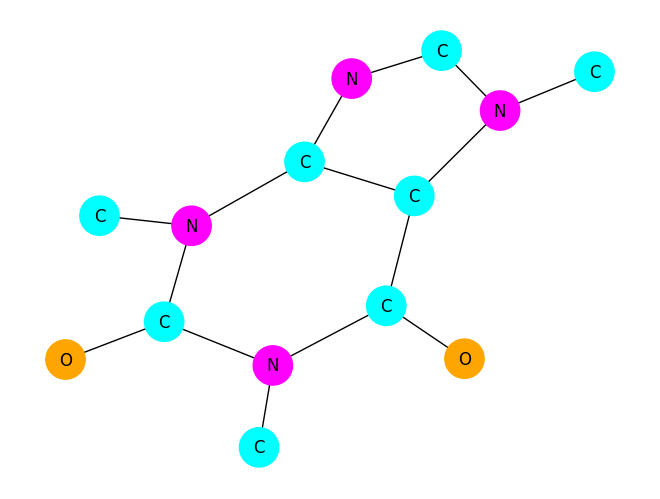

In [ ]:
caffeine_atom = nx.get_node_attributes(caffeine_nx, 'atom_symbol')

color_map = {'C': 'cyan',
             'O': 'orange',
             'N': 'magenta'}

caffeine_colors = []
for idx in caffeine_nx.nodes():
    if (caffeine_nx.nodes[idx]['atom_symbol'] in color_map):
        caffeine_colors.append(color_map[caffeine_nx.nodes[idx]['atom_symbol']])
    else:
        caffeine_colors.append('gray')

nx.draw(caffeine_nx,
        labels=caffeine_atom,
        with_labels = True,
        node_color=caffeine_colors,
        node_size=800)

plt.show()


In [ ]:
# print out the adjacency matrix ----------------------------------------------
import numpy as np
import networkx as nx
#matrix = nx.to_numpy_matrix(caffeine_nx)
matrix = np.array(nx.adjacency_matrix(caffeine_nx).todense())
print(matrix)
#Graph representation adjacency matrix



[[0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 1 0 0 1 0 0 0 0 0 0 0 0]
 [0 1 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 1 0 0 0 0 0 1 0 0]
 [0 1 0 0 1 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 1 1 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 1 0 0 0 1]
 [0 0 0 0 0 0 0 0 1 0 1 1 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 1 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0]]


#Embedding and graph based embedding

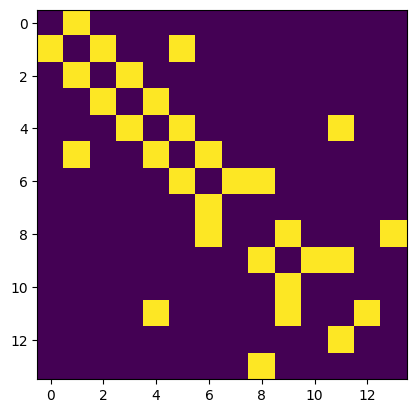